<a href="https://colab.research.google.com/github/SauleRub/DI_Bootcamp/blob/main/Week8/Day5/DailyChallenge_Week8Day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("unsdsn/world-happiness")

print("Path to dataset files:", path)

100%|██████████| 36.8k/36.8k [00:00<00:00, 55.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2


In [3]:
import os

# Check what was downloaded
print(os.listdir(path))

['2016.csv', '2017.csv', '2015.csv', '2018.csv', '2019.csv']


In [4]:
import pandas as pd

df = pd.read_csv(path + "/2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
print("Missing values:\n", df.isnull().sum())

df.columns = df.columns.str.strip().str.replace(" ", "_")

df.head()

Missing values:
 Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


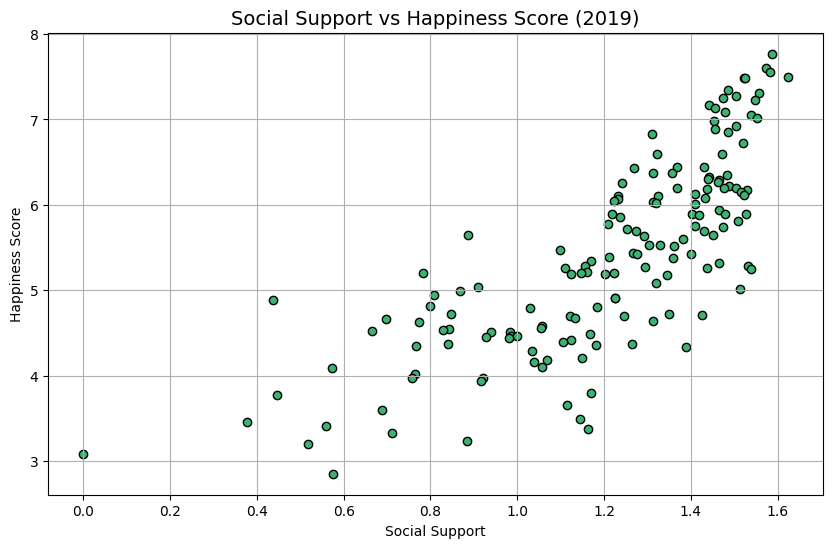

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df["Social_support"], df["Score"], color='mediumseagreen', edgecolor='black')
plt.title("Social Support vs Happiness Score (2019)", fontsize=14)
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.grid(True)
plt.show()

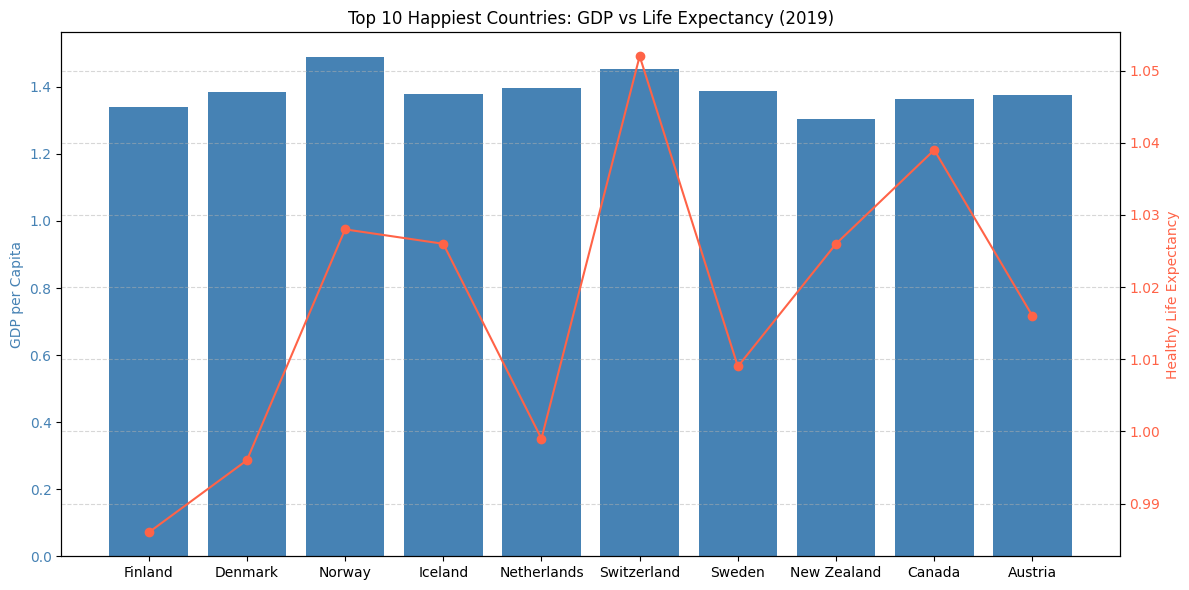

In [7]:
top10 = df.sort_values("Score", ascending=False).head(10)

import numpy as np

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(top10["Country_or_region"], top10["GDP_per_capita"], color='steelblue', label='GDP per Capita')
ax1.set_ylabel("GDP per Capita", color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

ax2 = ax1.twinx()

ax2.plot(top10["Country_or_region"], top10["Healthy_life_expectancy"], color='tomato', marker='o', label='Healthy Life Expectancy')
ax2.set_ylabel("Healthy Life Expectancy", color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')

plt.title("Top 10 Happiest Countries: GDP vs Life Expectancy (2019)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 📌 Interpretation:
	•	The happiest countries tend to have strong GDP and high life expectancy — suggesting a positive connection between economic development and well-being.
	•	However, the line also shows that even countries with slightly lower GDP (e.g., New Zealand) still maintain high life expectancy and happiness — meaning economic wealth isn’t the only factor.